In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [22]:
# Display the first few rows of the dataset
print(data.head())

# Get information about the dataset, including column data types and non-null counts
print(data.info())

# Generate summary statistics for the dataset, such as mean, min, max, etc.
print(data.describe())

# Check for missing values in each column
print(data.isnull().sum())


   car_ID  symboling                   CarName aspiration doornumber  \
0       1          3        alfa-romero giulia        std        two   
1       2          3       alfa-romero stelvio        std        two   
2       3          1  alfa-romero Quadrifoglio        std        two   
3       4          2               audi 100 ls        std       four   
4       5          2                audi 100ls        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000  

In [26]:
# Assuming 'CarName' is the categorical column
data = pd.get_dummies(data, columns=['CarName'])

# Now split the data into features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']


In [27]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
print(data.dtypes)


car_ID                   int64
symboling                int64
aspiration              object
doornumber              object
carbody                 object
                         ...  
CarName_volvo 246         bool
CarName_volvo 264gl       bool
CarName_volvo diesel      bool
CarName_vw dasher         bool
CarName_vw rabbit         bool
Length: 173, dtype: object


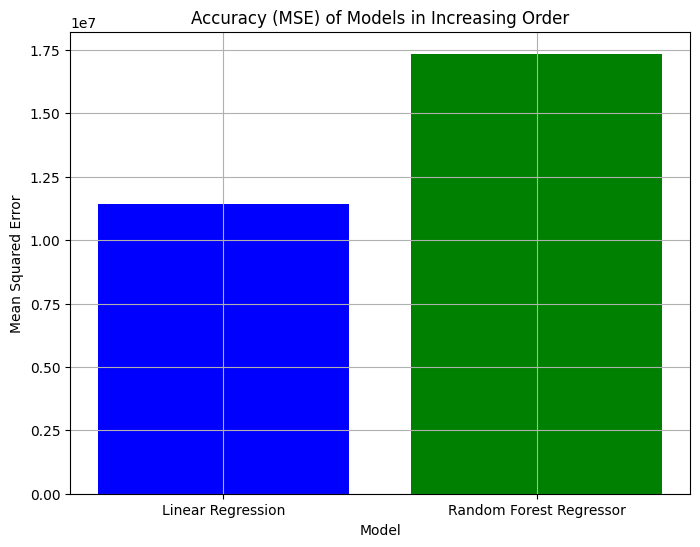

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming all columns except 'car_ID', 'symboling', and 'price' are categorical
categorical_columns = data.drop(columns=['car_ID', 'symboling', 'price']).columns

# Extract the target variable 'price' and the features (excluding the target)
X = data.drop(columns=['car_ID', 'symboling', 'price'])
y = data['price']

# Perform one-hot encoding on the selected categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)  # Use drop_first to avoid dummy variable trap

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Use 100 decision trees
rf_model.fit(X_train, y_train)

# Make predictions using both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Create a DataFrame to store the MSE values and model names
accuracy_df = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest Regressor'],
                            'Mean Squared Error': [mse_linear, mse_rf]})

# Sort the DataFrame by the MSE values in ascending order
accuracy_df = accuracy_df.sort_values(by='Mean Squared Error')

# Create a bar plot to compare the accuracy (MSE) of the models in increasing order
plt.figure(figsize=(8, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Mean Squared Error'], color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Accuracy (MSE) of Models in Increasing Order")
plt.grid(True)
plt.show()


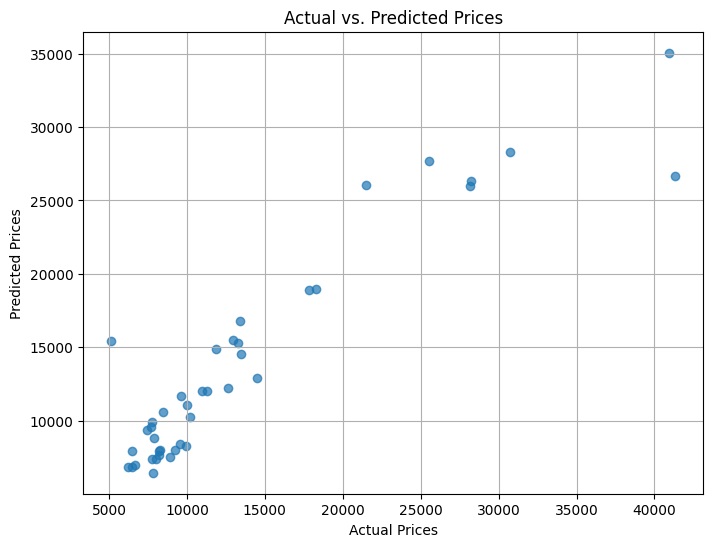

In [41]:
import matplotlib.pyplot as plt

# Create a scatter plot to compare actual vs. predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.show()


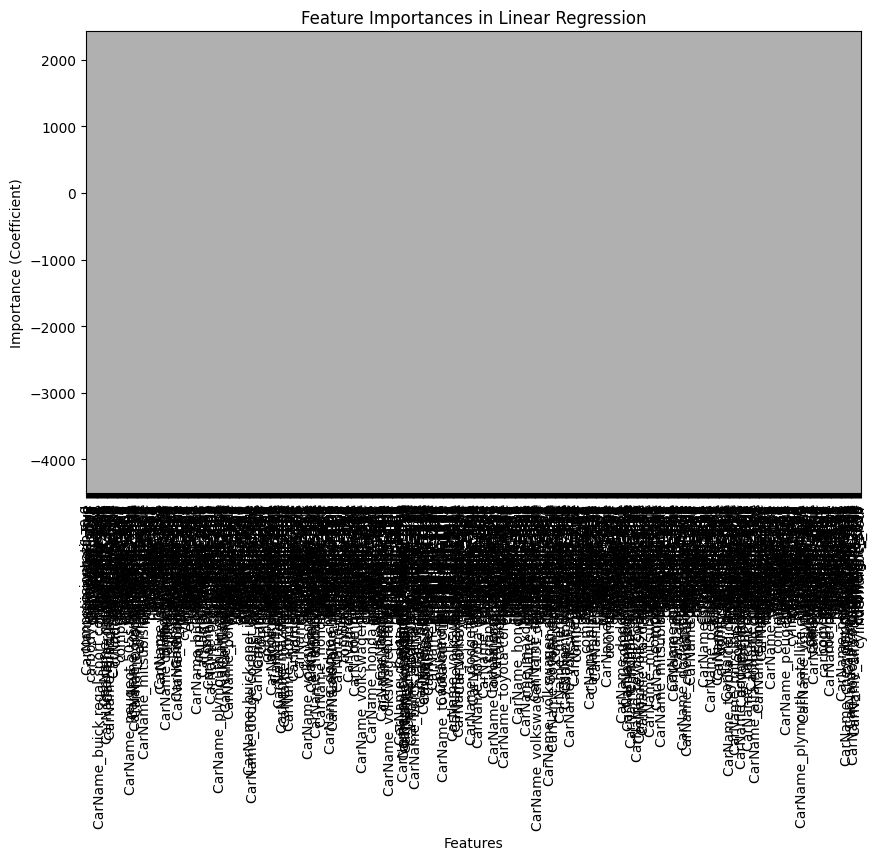

In [42]:
# Get the feature importances (coefficients) from the linear regression model
feature_importances = pd.Series(model.coef_, index=X_encoded.columns)

# Sort the feature importances in descending order
feature_importances = feature_importances.sort_values(ascending=False)

# Create a bar plot to display feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel("Features")
plt.ylabel("Importance (Coefficient)")
plt.title("Feature Importances in Linear Regression")
plt.grid(True)
plt.show()


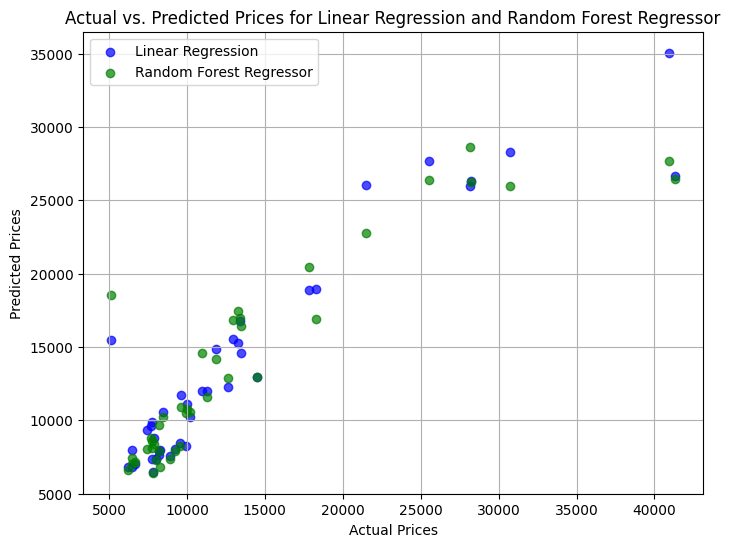

In [45]:
# Create a scatter plot to compare actual vs. predicted prices for both models
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Regressor', alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices for Linear Regression and Random Forest Regressor")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE) for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Compare MSE values
if mse_linear < mse_rf:
    print("Linear Regression has better accuracy (lower MSE) than Random Forest Regressor.")
else:
    print("Random Forest Regressor has better accuracy (lower MSE) than Linear Regression.")


Linear Regression has better accuracy (lower MSE) than Random Forest Regressor.
